<a href="https://colab.research.google.com/github/Debayan2024/Machine-Learing/blob/main/My_First_ML_Project(Salary_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Visualizing the dataset

In [ ]:
df = pd.read_csv("/content/Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


# Declaring Variables

In [ ]:
x = df["YearsExperience"].values
y = df["Salary"].values

In [ ]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [ ]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872])

# Plotting dataset

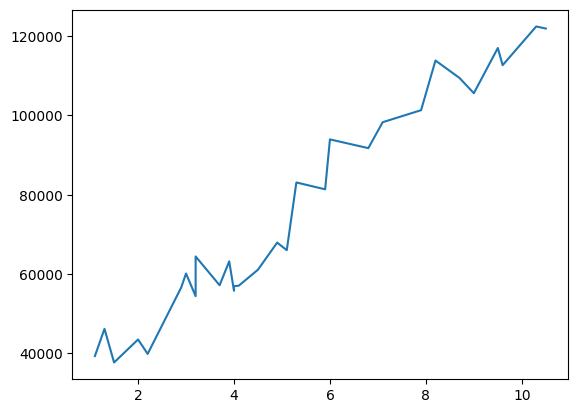

In [ ]:
plt.plot(x,y)

# Converting the variables into Numpy from Pandas

In [ ]:
x = np.array(x)
y = np.array(y)

# Normalizing the dataset

In [ ]:
def mean(x):
  return np.sum(x)/len(x)

In [ ]:
def varience(x):
  mean_value = mean(x)
  return np.sum((x-mean_value)**2)/len(x)

In [ ]:
def norm(x):
  mean_value = mean(x)
  varience_value = varience(x)
  return (x-mean_value)/np.sqrt(varience_value)

In [ ]:
x_norm = norm(x)
x_norm

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

# Plotting the normalized value of x along with y

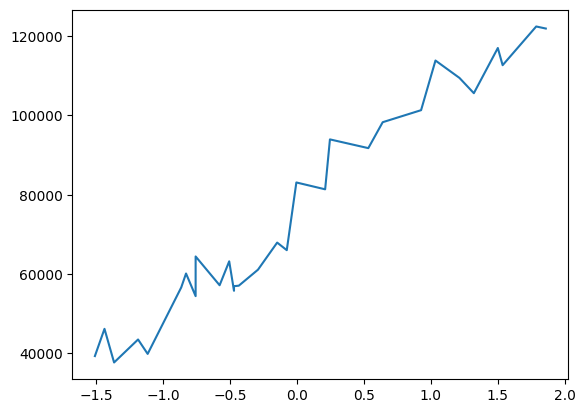

In [ ]:
plt.plot(x_norm,y)

* So,as we can see the best fit line is a straight line. Hence, Linear regression is the way to go.

# Declaring Classes
* We are going to use three different classes here
- 1. Learning Rate(lr) which is a constant used in loss function
- 2. maximum iteration (max_iter) which will tell us how we will going to run our loss function or iterate the loss function Gradient Descent for certain no. of steps i.e. what is the maximum number of steps that we want to run it for
- 3. Threshold - generally it is 10^-6, this is mostly in order to like where to stop for the stopping condition i.e. the difference between the current loss and the previous loss becomes less than 10^-6 then we need to stop as the loss is not changing much and we have reached a stable point in our linear regression learing

In [ ]:
import random

In [ ]:
class simpleLR:
  def __init__(self, lr = 0.1, max_iter = 2000, threshold = 1e-6):
    self.lr = lr #here we give random values as input
    self.max_iter = max_iter
    self.threshold = threshold
    self.weights = random.uniform(-1,1) #weights and biases are important, we will associate a weight with the feature we have here 'Years of Experience' like the equation y = wx+b, w = weight, x = feature & b = bias
    self.bias = random.uniform(-1,1) #we are associating random values firstly to our weight and bias here
  def predict(self, x):
    return self.weights*x + self.bias
  def fit(self, x, y): #this fit function will return the loss history and help us to understand how the losses are performing actually
    n = len(x)
    loss_history = []
    y_pred = self.predict(x)
    errors = y-y_pred
    prev_loss = (1/(2*n)) * np.sum(errors**2)
    loss_history.append(prev_loss)
    for i in range(self.max_iter):
      w_grad = (1/n) * np.sum(errors*x)
      b_grad = (1/n) * np.sum(errors)
      self.weights += self.lr * w_grad
      self.bias += self.lr * b_grad
      y_pred = self.predict(x)
      errors = y-y_pred
      curr_loss = (1/(2*n)) * np.sum(errors**2)
      if np.abs(curr_loss - prev_loss) < self.threshold:
        break
      prev_loss = curr_loss
      loss_history.append(curr_loss)
    return loss_history
  def plot(self, x, y):
    y_pred = self.predict(x)
    plt.plot(x,y)
    plt.plot(x,y_pred)

In [ ]:
model = simpleLR()

In [ ]:
loss_history = model.fit(x_norm, y)
loss_history

[np.float64(3251477944.6445713),
 np.float64(2636667875.57572),
 np.float64(2138671719.6299493),
 np.float64(1735294833.3138762),
 np.float64(1408559555.3978565),
 np.float64(1143903980.28588),
 np.float64(929532964.4451795),
 np.float64(755892441.614212),
 np.float64(615243618.1211283),
 np.float64(501318071.09173065),
 np.float64(409038377.99791855),
 np.float64(334291826.5919308),
 np.float64(273747119.9530806),
 np.float64(224705907.5756121),
 np.float64(184982525.5498624),
 np.float64(152806586.10900533),
 np.float64(126744075.16191101),
 np.float64(105633441.2947646),
 np.float64(88533827.86237599),
 np.float64(74683140.98214123),
 np.float64(63464084.60915101),
 np.float64(54376648.947028965),
 np.float64(47015826.06071013),
 np.float64(41053559.52279189),
 np.float64(36224123.62707809),
 np.float64(32312280.551549964),
 np.float64(29143687.660372145),
 np.float64(26577127.41851812),
 np.float64(24498213.622616373),
 np.float64(22814293.447935928),
 np.float64(21450318.10644482)

# Plotting the loss history

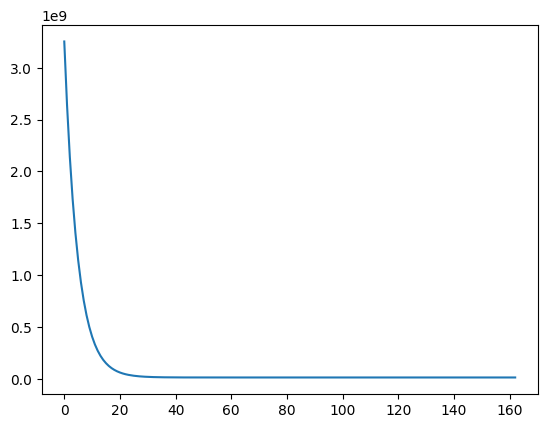

In [ ]:
plt.plot(loss_history)

# So, here we can see in the above graph that our iteration is 160+, not 2000 and then we have stopped it because the difference went below the threshold value, hence we do not need to train anymore, it's stable.

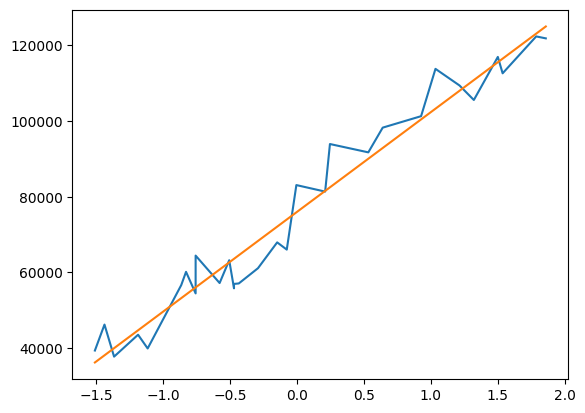

In [ ]:
model.plot(x_norm, y)

# here in the above graph we can see that the best fit line perfectly fits the dataset and it is the best fit line and that is how we solve our problem with linear regression. Now, if we give a new value as input in x, our model will predict its value as y.